In [1]:
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
cp = pd.read_csv('Taco Bell/customer_profiles.csv')
ad = pd.read_csv('Taco Bell/ad_details.csv')
ae = pd.read_csv('Taco Bell/ad_events.csv')

In [3]:
cp['gender'] = cp['gender'].replace({'M': 0, 'F': 1, 'O': 2})
cp = cp.drop('id', axis=1)
cp['ever_married'] = cp['ever_married'].replace({'Yes': 1, 'No': 0})
cp = cp.drop('home_state', axis=1)
cp = cp.drop('became_member_on (year month day)', axis=1)

scaler = StandardScaler()
scaled_array = scaler.fit_transform(cp)
df = pd.DataFrame(scaled_array)

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [4]:
bics = []
for i in range(2,20):
    gmo = GaussianMixture(n_components=i, random_state=i)
    gm = gmo.fit(df_train)
    bic = gm.bic(df_test)
    bics.append(bic)

In [5]:
print(bics)

[29997.177414222628, 3674.5714881400177, -35371.11787595774, -35195.05419472392, -60090.183086492754, -60861.355653373874, -61034.9875663951, -60787.09280906886, -68802.27822727965, -60563.43842197612, -69823.66259947233, -61352.75999975797, -69290.29270873513, -60775.83595907868, -70835.17764533125, -77350.55828115312, -77914.76193280297, -85076.66141798605]


In [6]:
frame = pd.DataFrame({'Clusters': range(2, 20), "BIC": bics})
frame.head()

,Clusters,BIC
0,2,29997.177414
1,3,3674.571488
2,4,-35371.117876
3,5,-35195.054195
4,6,-60090.183086


<AxesSubplot:xlabel='Clusters', ylabel='BIC'>

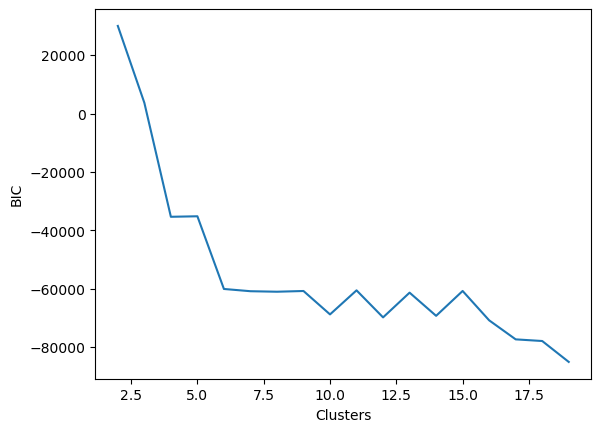

In [7]:
sns.lineplot(data=frame, x="Clusters", y="BIC")

In [8]:
min_bic_value = (frame['BIC'] - 0).abs().idxmin()
print(min_bic_value)

1


In [27]:
gm = GaussianMixture(n_components=min_bic_value+2).fit(df_train)
gm.bic(df_test)

3674.5607546583574

In [10]:
gm.means_

array([[-5.90399094e-03, -1.53321063e-02, -2.11108877e-02,
        -1.04987642e+00, -2.69707233e-03],
       [ 1.63904171e-03,  8.41419666e-03, -1.47288381e-03,
         9.52493055e-01, -3.27457950e-03],
       [ 1.06355702e+00,  4.98427229e-01,  2.05958303e+00,
         5.88090614e-01,  1.64770279e-01]])

In [11]:
predictions = gm.predict(df_test)

In [12]:
unscaled_array = scaler.inverse_transform(df_test)

In [13]:
df = pd.DataFrame(unscaled_array)

In [14]:
df.insert(5, "Predict", predictions, True)

In [15]:
df.head()

,0,1,2,3,4,Predict
0,1.0,52.0,79000.0,1.0,2.0,1
1,1.0,89.0,39000.0,1.0,2.0,1
2,1.0,18.0,43000.0,0.0,2.0,0
3,0.0,81.0,76000.0,1.0,2.0,1
4,0.0,42.0,84000.0,0.0,3.0,0


In [16]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        14825 non-null  int64  
 1   age           14825 non-null  int64  
 2   income        14825 non-null  float64
 3   ever_married  14825 non-null  int64  
 4   kids          14825 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 579.2 KB


<AxesSubplot:xlabel='2', ylabel='1'>

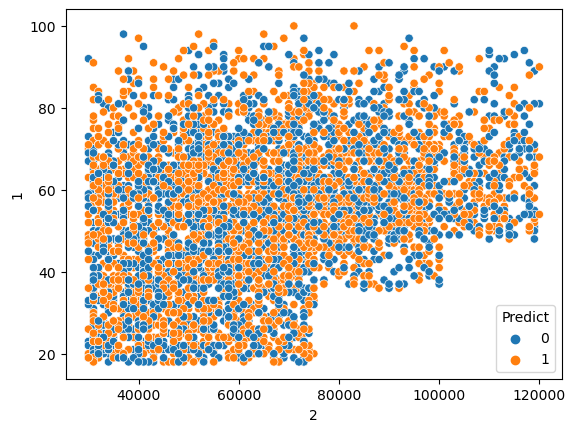

In [17]:
sns.scatterplot(data = df, y = 1, x = 2, hue = "Predict")

In [18]:
df.corr()

,0,1,2,3,4,Predict
0,1.000000,0.137257,0.209319,-0.006763,-0.015167,-0.006763
1,0.137257,1.000000,0.318727,0.001415,-0.003383,0.001415
2,0.209319,0.318727,1.000000,0.001846,-0.021080,0.001846
3,-0.006763,0.001415,0.001846,1.000000,-0.007622,1.000000
4,-0.015167,-0.003383,-0.021080,-0.007622,1.000000,-0.007622
Predict,-0.006763,0.001415,0.001846,1.000000,-0.007622,1.000000


In [24]:
var = scaler.inverse_transform(gm.means_)
meansDF = pd.DataFrame(var)
meansDF = meansDF.rename(columns={0: 'gender', 1: 'age', 2: "income", 3: "ever_married", 4: "kids"})
meansDF.head()

,gender,age,income,ever_married,kids
0,0.438926,54.127005,64949.047673,0.000000,1.686813
1,0.442884,54.539789,65373.180856,1.000000,1.685961
2,1.000000,63.057744,109886.982273,0.818014,1.933908


In [ ]:
#0: any gender, 54 age, medium income, not married, kids
#1: any gender, 54 age, medium income, married, kids
#2: female, older, high income, usually married, usually with kids
#BIC: 3674.5607546583574

In [25]:
sns.scatterplot(data = meansDF, y = 0, x = 1)

ValueError: If using all scalar values, you must pass an index